In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..')) + '/src/'
if module_path not in sys.path:
    sys.path.insert(0, module_path)
import numpy as np

import torch
from torch.fft import fft, fft2
from utils.czt import custom_fft2, custom_ifft2, czt1d, czt2d
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [3]:
size = 100
x1 = torch.randn(size)

y_fft = fft(x1)
y_czt = czt1d(x1)
print(torch.allclose(y_fft, y_czt, atol=1e-3))
print(torch.norm(y_fft - y_czt) / torch.norm(y_fft))

True
tensor(1.1160e-05)


In [4]:
size = 101
x2 = torch.randn(size, size)

y_fft = fft2(x2)
y_czt = czt2d(x2)
print(torch.allclose(y_fft, y_czt, atol=1e-1))
print(torch.norm(y_fft - y_czt) / torch.norm(y_fft))

True
tensor(9.6824e-06)


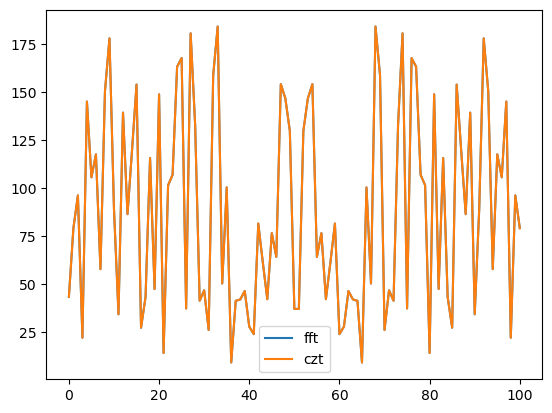

In [5]:
plt.plot(torch.abs(y_fft[0]).numpy())
plt.plot(torch.abs(y_czt[0]).numpy())
plt.legend(['fft', 'czt'])
plt.show()

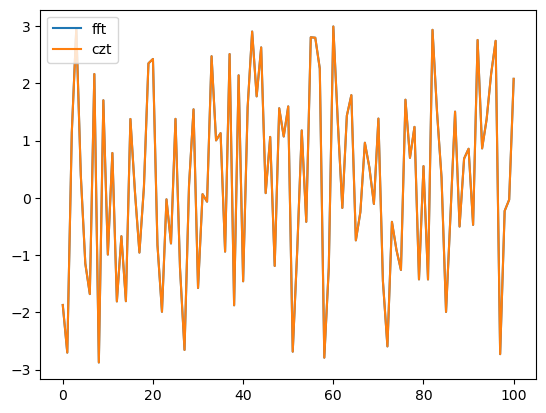

In [6]:
plt.plot(torch.angle(y_fft[50]).numpy())
plt.plot(torch.angle(y_czt[50]).numpy())
plt.legend(['fft', 'czt'])
plt.show()

# FFT2 with a disk pupil

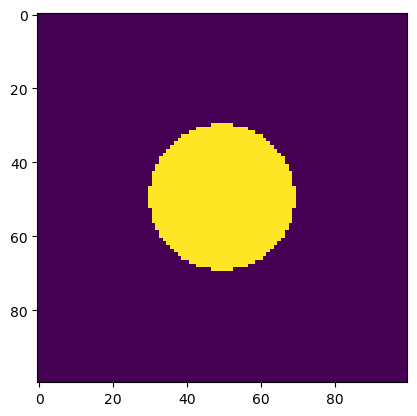

In [7]:
# create a mask with the form of a disk
size = 100
radius = 0.4
k = torch.linspace(-1, 1, size)
kx, ky = torch.meshgrid(k, k, indexing='ij')
mask = (kx**2 + ky**2 <= radius**2).float()
plt.imshow(mask)
plt.show()

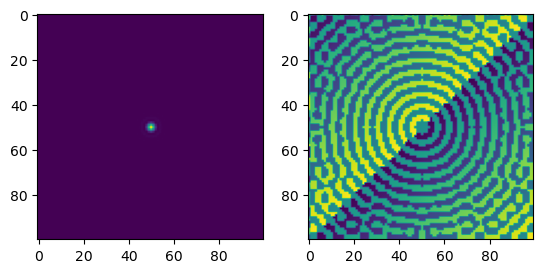

In [8]:
y = fft2(torch.fft.fftshift(mask))
y = torch.fft.fftshift(y)
plt.figure()
plt.subplot(121)
plt.imshow(torch.abs(y)**2)
plt.subplot(122)
plt.imshow(torch.angle(y))
plt.show()

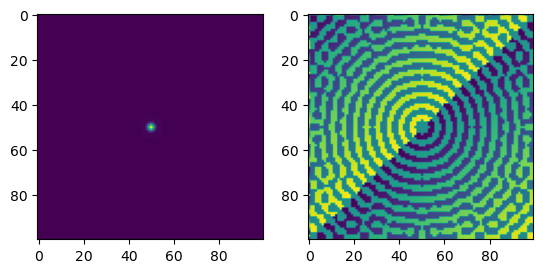

In [9]:
y = czt2d(torch.fft.fftshift(mask))
y = torch.fft.fftshift(y)
plt.figure()
plt.subplot(121)
plt.imshow(torch.abs(y)**2)
plt.subplot(122)
plt.imshow(torch.angle(y))
plt.show()

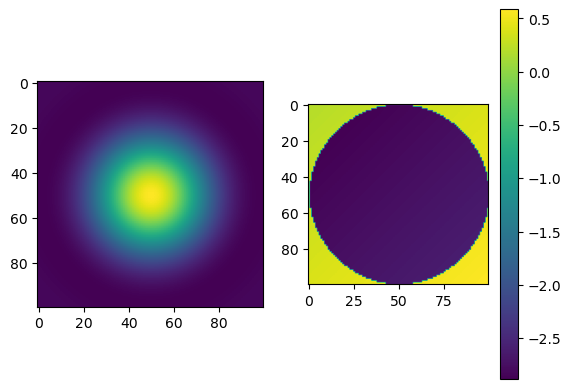

In [12]:
y = custom_fft2(mask, k_start=-np.pi/16, k_end=np.pi/16, fftshift_input=True)

plt.figure()
plt.subplot(121)
plt.imshow(torch.abs(y)**2)
plt.subplot(122)
plt.imshow(torch.angle(y))
plt.colorbar()
plt.show()

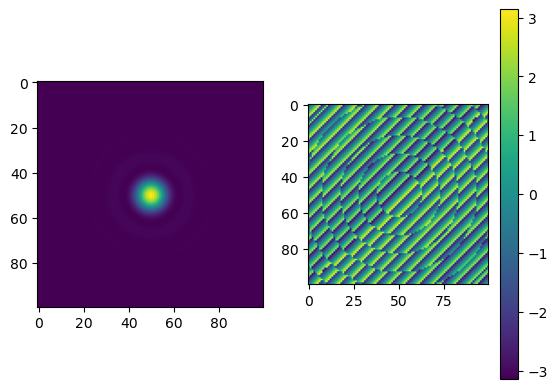

In [11]:
y = custom_ifft2(mask, k_start=-np.pi/4, k_end=np.pi/4, fftshift_input=True)

plt.figure()
plt.subplot(121)
plt.imshow(torch.abs(y)**2)
plt.subplot(122)
plt.imshow(torch.angle(y))
plt.colorbar()
plt.show()